In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast  # This library is used to parse the string representation of the dictionary
pd.options.mode.chained_assignment = None 

In [2]:
data_path = './MovieSummaries/'
data_plot_sum = data_path + 'plot_summaries.txt'
data_movie_name = data_path + 'movie.metadata.tsv'
data_character_name = data_path + 'character.metadata.tsv'
data_tvtropes = data_path + 'tvtropes.clusters.txt'
data_namecluster = data_path + 'name.clusters.txt'

In [3]:
col_name_movie = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages (Freebase ID:name tuples)", "Movie countries (Freebase ID:name tuples)", "Movie genres (Freebase ID:name tuples)"]
col_name_charcter = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", "Actor height (in meters)","Actor ethnicity (Freebase ID)","Actor name","Actor age at movie release","Freebase character/actor map ID","Freebase character ID","Freebase actor ID"]

In [4]:
df_plot = pd.read_csv(data_plot_sum,sep='\t', header=None, names=["movie ID","Summary"])
df_movie = pd.read_table(data_movie_name,sep='\t', header=None, names = col_name_movie)
df_character = pd.read_table(data_character_name,sep='\t', header=None, names = col_name_charcter)
df_tvtropes = pd.read_csv(data_tvtropes, sep='\t', header=None, names=["character type","match"])
df_name = pd.read_csv(data_namecluster, sep='\t', header=None, names=["character name", "movie ID"])

In [5]:
df_plot.head(1)

,movie ID,Summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."


In [6]:
df_movie.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


In [7]:
df_character.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7


In [8]:
df_name.head(1)

,character name,movie ID
0,Stuart Little,/m/0k3w9c


## My test Milestone 2

In [9]:
merge_df = pd.merge(df_character, df_movie, on=['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date'], how='inner')
merge_df.head(1)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Movie name,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


### Some random plots to check some basics informations

<Axes: xlabel='Actor ethnicity (Freebase ID)', ylabel='Count'>

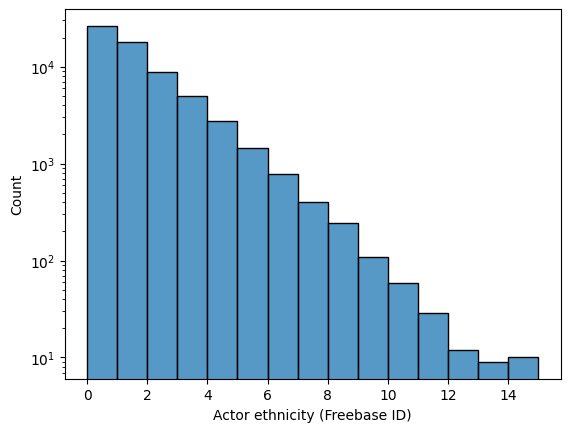

In [10]:
merge_df['Actor ethnicity (Freebase ID)'].value_counts()
num_ethnicities = merge_df.groupby("Wikipedia movie ID")["Actor ethnicity (Freebase ID)"].apply(lambda x: x.nunique())
sns.histplot(num_ethnicities, bins=15, log=True)

Text(0.5, 1.0, 'Number of actors per movie')

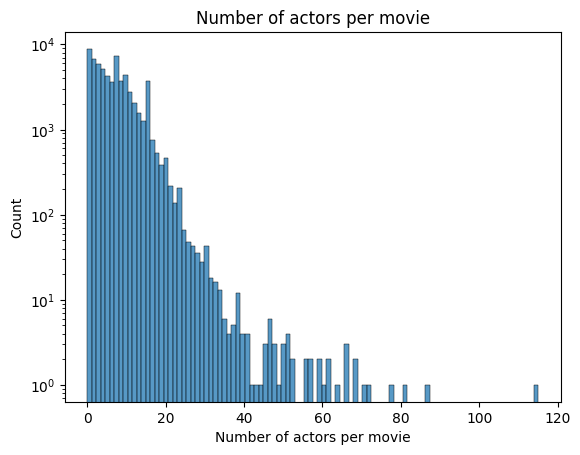

In [11]:
merge_df.groupby("Wikipedia movie ID")['Actor name'].count()
sns.histplot(merge_df.groupby("Wikipedia movie ID")['Actor name'].count(), bins=100, log=True)
plt.xlabel('Number of actors per movie')
plt.title('Number of actors per movie')

In [12]:
df_movie_filter = df_movie.dropna(subset=['Movie release date']).copy()
df_movie_filter['Movie release year'] = df_movie_filter['Movie release date'].str[:4]

Text(0.5, 1.0, 'Number of movies per year')

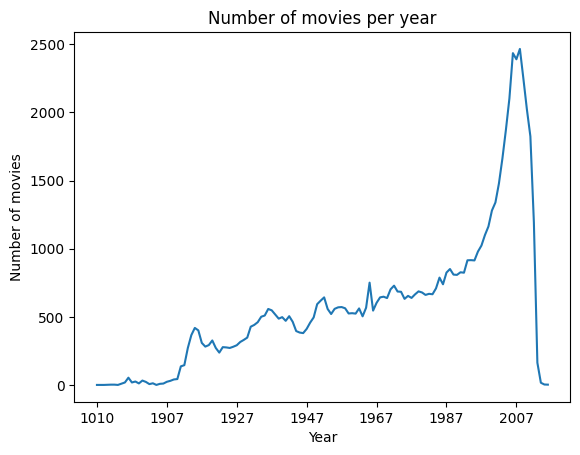

In [13]:
df_movie_filter.groupby('Movie release year').count()['Movie name'].plot()
plt.ylabel('Number of movies')
plt.xlabel('Year')
plt.title('Number of movies per year')

## Analyzing plot summaries

In [14]:
df_plot.rename(columns={'movie ID':'Wikipedia movie ID'}, inplace=True)
big_merge = pd.merge(df_plot, merge_df, on=['Wikipedia movie ID'], how='inner')
big_merge.drop(columns=['Movie release date', 'Actor date of birth', 'Actor height (in meters)', 'Movie box office revenue', 'Movie runtime', 'Movie languages (Freebase ID:name tuples)', 'Movie countries (Freebase ID:name tuples)', 'Movie genres (Freebase ID:name tuples)'], inplace=True)
big_merge_filter = big_merge.dropna(subset=['Character name','Summary'] )
big_merge_filter.head(1)

,Wikipedia movie ID,Summary,Freebase movie ID,Character name,Actor gender,Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Movie name
6,31186339,The nation of Panem consists of a wealthy Capi...,/m/0gkz15s,Foxface,NaN,NaN,Jacqueline Emerson,NaN,/m/0gwc39w,/m/0gwc39z,/m/0gwc3b5,The Hunger Games


In [15]:
# text = big_merge_filter.iloc[0]['Summary']
# character_name = big_merge_filter[big_merge_filter['Wikipedia movie ID'] == 31186339]['Character name'].values


# character_count = []
# for s in character_name: 
#     splited_name = s.split()
#     max_count = 0
#     for name in splited_name:   #in case in the plot summary they do not use the full name
#         if text.count(name) > max_count:
#             max_count = text.count(name)

#     character_count.append(max_count)


# filtered_character_name = [name for i, name in enumerate(character_name) if character_count[i] != 0]
# filtered_character_count = [count for count in character_count if count != 0]


In [16]:
# sns.barplot(x=filtered_character_name, y=filtered_character_count)
# plt.xticks(rotation=90)
# plt.ylabel('Number of occurences in plot summary')
# plt.title('Exemple with hunger games')


In [17]:
hunger_games = big_merge_filter[big_merge_filter['Movie name'] == 'The Hunger Games'] #hunger games

In [18]:
def compute_apparition_frequency(character_name, text):
    prepo_list = ['the','at', 'in', 'on', 'of', 'for', 'to', 'with', 'from', 'by', 'about', 'as', 'into', 'like', 'through', 'after', 'over', 'between', 'out', 'against', 'during', 'without', 'before', 'under', 'around', 'among']
    splited_name = character_name.split()
    max_count = 0
    for name in splited_name:   #in case in the plot summary they do not use the full name
        if text.count(name) > max_count and name not in prepo_list:
            max_count = text.count(name)
    return max_count

In [19]:
hunger_games['frequency_apparition'] = hunger_games.apply(lambda row: compute_apparition_frequency(row['Character name'], row['Summary']), axis=1)


Text(0.5, 1.0, 'Exemple with The Hunger Games')

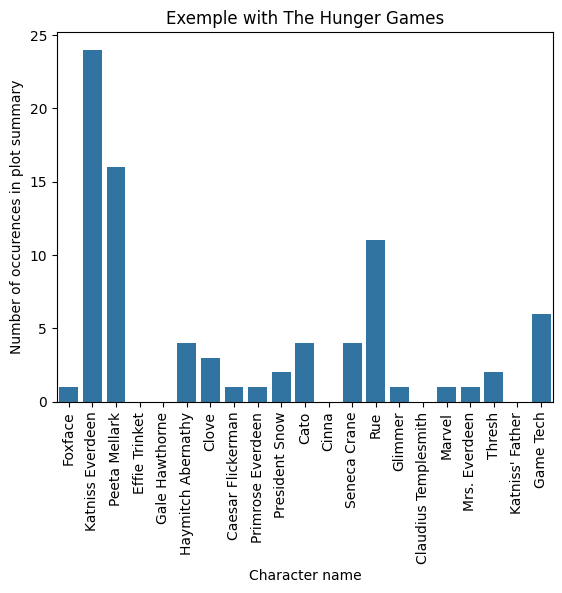

In [20]:
sns.barplot(x=hunger_games['Character name'], y=hunger_games['frequency_apparition'])
plt.xticks(rotation=90)
plt.ylabel('Number of occurences in plot summary')
plt.title('Exemple with The Hunger Games')

Text(0.5, 1.0, 'Exemple with Indiana Jones')

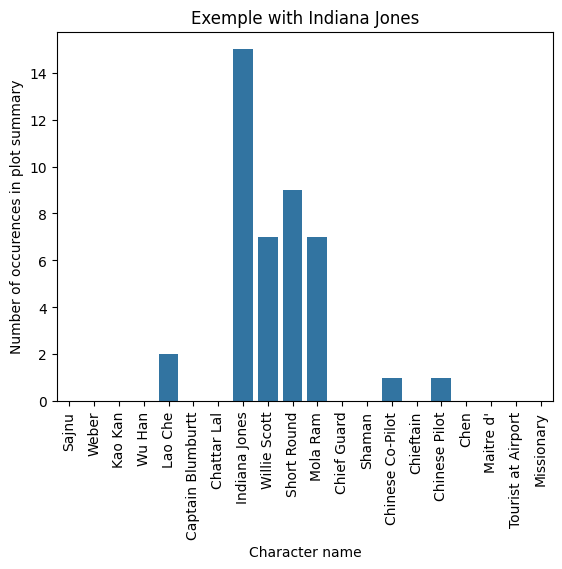

In [21]:
#big_merge_filter.loc[big_merge_filter['Movie name'] == 'Indiana%']
#indiana_jones = big_merge_filter[big_merge_filter['Movie name'].str.startswith('Indiana')]

indiana_jones = big_merge_filter.loc[big_merge_filter['Movie name'] == 'Indiana Jones and the Temple of Doom']
indiana_jones.loc[:,'frequency_apparition'] = indiana_jones.apply(lambda row: compute_apparition_frequency(row['Character name'], row['Summary']), axis=1)


sns.barplot(x=indiana_jones['Character name'], y=indiana_jones['frequency_apparition'])
plt.xticks(rotation=90)
plt.ylabel('Number of occurences in plot summary')
plt.title('Exemple with Indiana Jones')


## separating tvtropes

In [22]:
def convert_to_dict(string_repr):
    try:
        return ast.literal_eval(string_repr)
    except (ValueError, SyntaxError):
        return None

df_tvtropes['match_dict'] = df_tvtropes['match'].apply(convert_to_dict)
df_tvtropes_clean = pd.concat([df_tvtropes, pd.json_normalize(df_tvtropes['match_dict'])], axis=1)
df_tvtropes_clean.drop(['match', 'match_dict'], axis=1, inplace=True)
df_tvtropes_clean.rename(columns={'char':'Character name','movie':'Movie name','id':'Freebase character/actor map ID','actor':'Actor name'}, inplace=True)
df_tvtropes_clean.head()

,character type,Character name,Movie name,Freebase character/actor map ID,Actor name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [23]:
df_tvtropes_clean.isnull().sum().sum()  #no nan left in the df

0